In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
%matplotlib inline

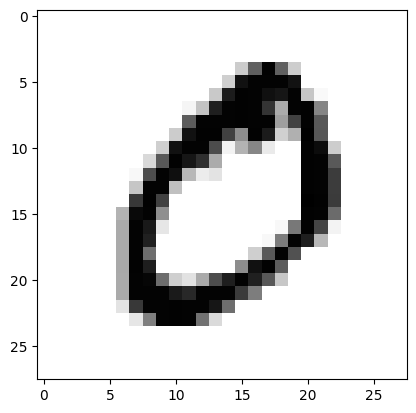

0

In [4]:
from matplotlib import pyplot as plt
import numpy as np
data = np.array(255 - x_train[1])
plt.imshow(data, cmap='gray', vmin=0, vmax=255)
plt.show()
y_train[1]

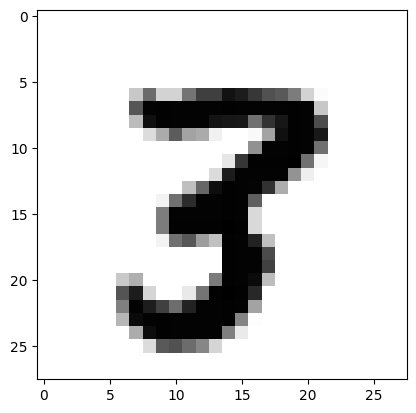

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [5]:
generator = np.random.default_rng(seed=5)
idx = generator.integers(low=0, high=x_train.shape[0], size=10000)

# Normslizzazione delle immagini in un range tra 0 e 1
x_train_norm = (x_train/255).reshape(x_train.shape[0], -1)[idx,:]
x_test_norm = (x_test/255).reshape(x_test.shape[0], -1)
y_train_cut = y_train[idx]

data = np.array(1 - x_train_norm[1].reshape(28,28))
plt.imshow(data, cmap='gray', vmin=0, vmax=1)
plt.show()
print(y_train_cut[1])

# le etichette ora sono numeri da 0 a 9, se utilizziamo la softmax nell'ultimo
# layer bisogna utilizzare un array one-hot-encoded
#print(y_train[1])

y_train_one_hot = np.eye(10)[y_train_cut]
y_test_one_hot = np.eye(10)[y_test]

print(y_train_one_hot[1])


In [10]:
def train(neuron):
  initializer = tf.keras.initializers.GlorotUniform(seed=5)
  epochs = 1
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.experimental.RandomFourierFeatures(
        output_dim=neuron,
        kernel_initializer=initializer,
        trainable = False),
    tf.keras.layers.Dense(units=10, activation = 'softmax'),])

  optimizer = tf.keras.optimizers.experimental.SGD(
      learning_rate=0.01,
      momentum=0.95)

  model.compile(
      optimizer=optimizer,
      loss='mse',
      metrics=['mse', 'accuracy'])

  history = model.fit(x=x_train_norm, y=y_train_one_hot, epochs=epochs)
  evaluation = model.evaluate(x=x_test_norm, y=y_test_one_hot)
  zero_one_loss_train = 1- history.history['accuracy'][epochs-1]
  squared_loss_train = history.history['mse'][epochs-1]
  zero_one_loss_test = 1 - evaluation[2]
  squared_loss_test = evaluation[1]

  return zero_one_loss_train, squared_loss_train, zero_one_loss_test, squared_loss_test



In [11]:
neurons_in_hidden_layer = [1,2,3,4,5,7,8,9,10,11,12,13,14,16,18,26,51,76]

#13 neuroni -> 10k param
#26 neuroni -> 20k param
#39 neuroni -> 30k param
#51 neuroni -> 40k param
#63 neuroni -> 50k param
#76 neuroni -> 60k param



In [12]:
def get_losses():
  results_zero_one_loss_train = []
  results_zero_one_loss_test = []
  results_squared_loss_train = []
  results_squared_loss_test = []
  for neurons in neurons_in_hidden_layer:
    print(neurons)
    zero_one_loss_train, squared_loss_train, zero_one_loss_test, squared_loss_test = train(neurons)
    results_zero_one_loss_train.append(zero_one_loss_train)
    results_squared_loss_train.append(squared_loss_train)
    results_zero_one_loss_test.append(zero_one_loss_test)
    results_squared_loss_test.append(squared_loss_test)
  return results_zero_one_loss_train, results_squared_loss_train, results_zero_one_loss_test, results_squared_loss_test



In [13]:
results_zero_one_loss_train, results_squared_loss_train, results_zero_one_loss_test, results_squared_loss_test = get_losses()

1
313/313 [==============================] - 1s 2ms/step - loss: 0.0905 - mse: 0.0905 - accuracy: 0.1133
2
313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - mse: 0.0881 - accuracy: 0.1854
3
313/313 [==============================] - 1s 2ms/step - loss: 0.0893 - mse: 0.0893 - accuracy: 0.2270
4
313/313 [==============================] - 1s 3ms/step - loss: 0.0870 - mse: 0.0870 - accuracy: 0.2478
5
313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - mse: 0.0889 - accuracy: 0.2186
7
313/313 [==============================] - 1s 2ms/step - loss: 0.0885 - mse: 0.0885 - accuracy: 0.2479
8
313/313 [==============================] - 1s 2ms/step - loss: 0.0884 - mse: 0.0884 - accuracy: 0.2639
9
313/313 [==============================] - 1s 3ms/step - loss: 0.0885 - mse: 0.0885 - accuracy: 0.2464
10
313/313 [==============================] - 1s 3ms/step - loss: 0.0906 - mse: 0.0906 - accuracy: 0.2808
11
313/313 [==============================] - 1s 2ms/s

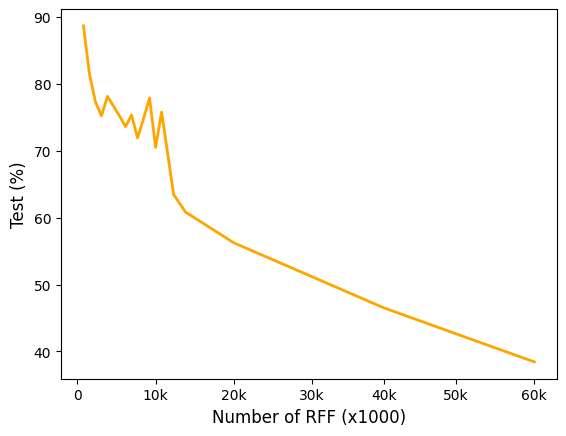

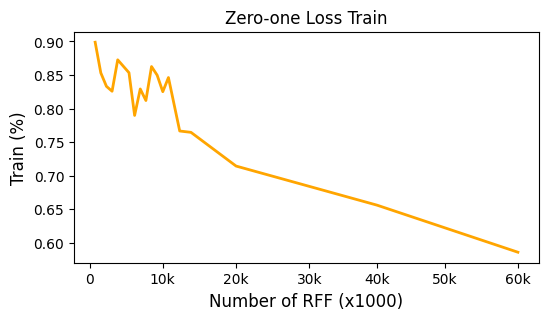

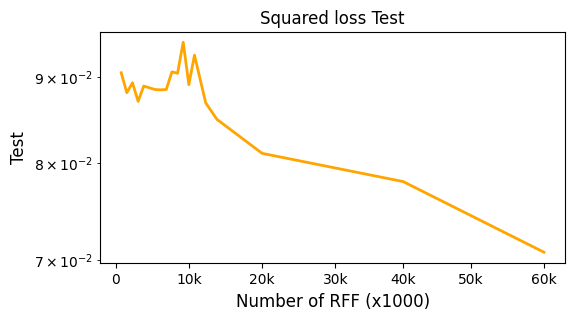

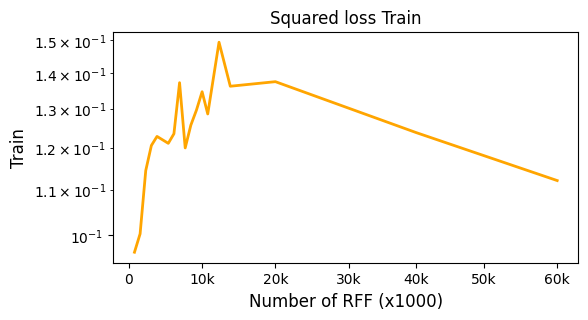

In [14]:
plt.plot(neurons_in_hidden_layer, np.array(results_zero_one_loss_test)*100, linewidth=2.0, color = 'orange', label = "RFF")
plt.xticks([0,13, 26, 39, 51, 63, 76], ["0","10k", "20k", "30k", "40k", "50k", "60k"])
plt.xlabel('Number of RFF (x1000)', fontsize=12)
plt.ylabel('Test (%)', fontsize=12)
plt.show()

print()

plt.figure(figsize=(6,3))

plt.title("Zero-one Loss Train")
#plt.yscale("log")
plt.plot(neurons_in_hidden_layer, np.array(results_zero_one_loss_train), linewidth=2.0, color = 'orange', label = "RFF")
plt.xticks([0,13, 26, 39, 51, 63, 76], ["0","10k", "20k", "30k", "40k", "50k", "60k"])
plt.xlabel('Number of RFF (x1000)', fontsize=12)
plt.ylabel('Train (%)', fontsize=12)
plt.show()

print()

plt.figure(figsize=(6,3))

plt.title("Squared loss Test")
plt.yscale("log")
plt.plot(neurons_in_hidden_layer, np.array(results_squared_loss_test), linewidth=2.0, color = 'orange', label = "RFF")
plt.xticks([0,13, 26, 39, 51, 63, 76], ["0","10k", "20k", "30k", "40k", "50k", "60k"])
plt.xlabel('Number of RFF (x1000)', fontsize=12)
plt.ylabel('Test', fontsize=12)
plt.show()

print()

plt.figure(figsize=(6,3))

plt.title("Squared loss Train")
plt.yscale("log")
plt.plot(neurons_in_hidden_layer, np.array(results_squared_loss_train), linewidth=2.0, color = 'orange', label = "RFF")
plt.xticks([0,13, 26, 39, 51, 63, 76], ["0","10k", "20k", "30k", "40k", "50k", "60k"])
plt.xlabel('Number of RFF (x1000)', fontsize=12)
plt.ylabel('Train',fontsize=12)
plt.show()

In [ ]:
# MODELLO BASE DA UTILIZZARE SINGOLARMENTE SE SERVE
'''initializer = tf.keras.initializers.GlorotUniform(
    seed=5
)

model = tf.keras.Sequential([
  tf.keras.Input(shape=(784,)),
  tf.keras.layers.experimental.RandomFourierFeatures(
      output_dim=13,
      kernel_initializer=initializer),
  tf.keras.layers.Dense(units=10, activation = 'linear'),
])

model.layers[0].trainable = False

optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.001,
    momentum=0.95)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mse', tf.keras.metrics.Accuracy()]
)
'''